In [ ]:
!pip install investpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import investpy as inv
import numpy as np
import statistics as statistics

In [ ]:
def retornos(ativo, data_inicio, data_fim):
  """
  Pega o retorno do ativo na data especificada. Além disso, cria uma coluna com o dia da semana dessa data e
  outras duas referentes à volatilidade EWMA
  """
  search_result = inv.search_quotes(text=ativo, products=['commodities'], n_results=1)
  historical_data = search_result.retrieve_historical_data(from_date=data_inicio, to_date=data_fim)
  df_historic = historical_data
  df_historic.iloc[0] = 0
  df_historic['return'] = np.log(df_historic['Close']/df_historic['Close'].shift(1))
  df_historic.iloc[1] = 0
  return df_historic

def retornosFut(ativo, data_inicio, data_fim):
  """
  Pega o retorno do ativo na data especificada. Além disso, cria uma coluna com o dia da semana dessa data e
  outras duas referentes à volatilidade EWMA
  """
  search_result = inv.search_quotes(text=ativo, products=['fxfutures'], n_results=1)
  historical_data = search_result.retrieve_historical_data(from_date=data_inicio, to_date=data_fim)
  df_historic = historical_data
  df_historic.iloc[0] = 0
  df_historic['return'] = np.log(df_historic['Close']/df_historic['Close'].shift(1))
  df_historic.iloc[1] = 0
  return df_historic


In [ ]:
# Catching data from assets
inicio = '01/01/2022'
fim = '13/07/2022'
#natural gás
ng = retornos('NGc1',inicio,fim)
ng.dropna(inplace = True)

#Euro
euro = retornosFut('ECMc1',inicio,fim)
euro.dropna(inplace = True)


,Open,High,Low,Close,Volume,Change Pct,return
Date,,,,,,,
2022-01-04,0.000,0.000,0.000,0.000,0,0.00,0.000000
2022-01-05,3.747,3.897,3.717,3.882,96811,4.44,0.043434
2022-01-06,3.842,3.931,3.801,3.812,116579,-1.80,-0.018196
2022-01-07,3.860,3.980,3.800,3.916,127012,2.73,0.026917
2022-01-10,4.144,4.213,3.977,4.079,177628,4.16,0.040781
...,...,...,...,...,...,...,...
2022-07-07,5.539,6.381,5.488,6.297,127670,14.28,0.133509
2022-07-08,6.188,6.305,6.012,6.034,107326,-4.18,-0.042663
2022-07-11,6.446,6.689,6.232,6.426,109392,6.50,0.062942


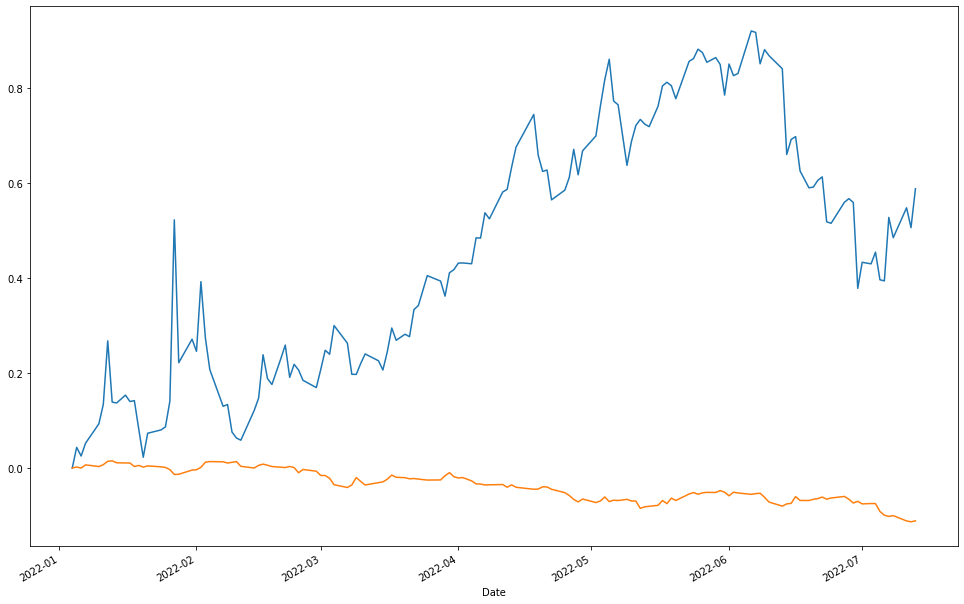

In [ ]:
ng['return'].cumsum().plot()
euro['return'].cumsum().plot()
ng

In [ ]:
# days of greatest variation in natural gas

Psorted = ng.sort_values(by=['return'], ascending=False)
Psorted[0:3].index


Nsorted = ng.sort_values(by=['return'], ascending=True)
Nsorted[0:3].index

DatetimeIndex(['2022-01-28', '2022-06-30', '2022-06-14'], dtype='datetime64[ns]', name='Date', freq=None)

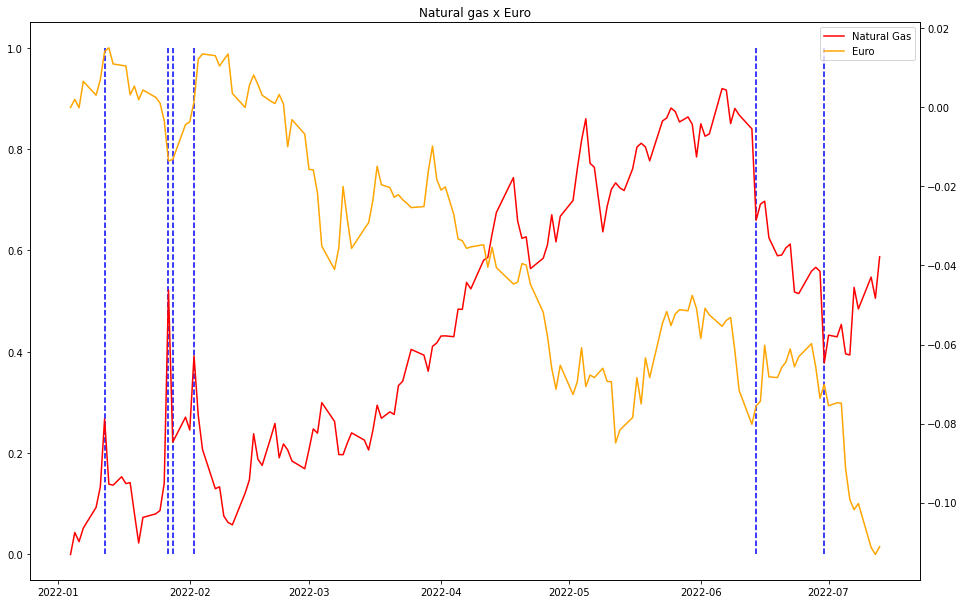

a correlação é [[ 1.         -0.09033674]
 [-0.09033674  1.        ]]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

plt.rcParams["figure.figsize"] = [13.50, 8.50]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot()
l1, = ax1.plot(ng['return'].cumsum(), color='red')
ax2 = ax1.twinx()
l2, = ax2.plot(euro['return'].cumsum(), color='orange')

plt.legend([l1, l2], ["Natural Gas", "Euro"])
plt.title('Natural gas x Euro')

ax1.vlines([Psorted[0:3].index,Nsorted[0:3].index], 0, 1, linestyles='dashed', colors='blue')
#ax1.vlines(dt.datetime(2022, 2, 24), 0, 1, linestyles='dashed', colors='blue')

plt.show()

correl = np.corrcoef(ng['return'],euro['return'])
print('a correlação é',correl)



In [ ]:
#Proportion
std_ng = np.std(ng['return'])
std_eur = np.std(euro['return'])

print("O desvio padrão do gas natural contra o euro é",std_ng/std_eur)

O desvio padrão do gas natural contra o euro é 11.441338626668383


In [ ]:
# Proportion adjusted
import pandas as pd
#stressed = Psorted[0:6] + Nsorted[0:6]
stressedGN =pd.concat([Psorted[0:4], Nsorted[0:4]]).sort_values(by='Date')
stressedGN

stressedEURO1 =euro.loc[Psorted[0:4].index]
stressedEURO2 = euro.loc[Nsorted[0:4].index]
stressedEURO =pd.concat([stressedEURO1, stressedEURO2]).sort_values(by='Date') 

stressedEURO

,Open,High,Low,Close,Volume,Change Pct,return
Date,,,,,,,
2022-01-12,1.1378,1.1467,1.1369,1.1464,36429,0.71,0.007091
2022-01-13,1.1457,1.1496,1.1449,1.1475,33324,0.10,0.000959
2022-01-27,1.1265,1.1265,1.1141,1.1151,39165,-1.01,-0.010171
2022-01-28,1.1155,1.1184,1.1131,1.1155,27826,0.04,0.000359
2022-02-02,1.1281,1.1340,1.1275,1.1319,22685,0.51,0.005049
2022-06-14,1.0473,1.0553,1.0465,1.0481,33123,0.47,0.004686
2022-06-30,1.0499,1.0546,1.0439,1.0538,36484,0.35,0.003517
2022-07-07,1.0241,1.0274,1.0195,1.0209,29140,-0.25,-0.002544


Text(0.5, 0, 'dias de muita variação no Gás natural')

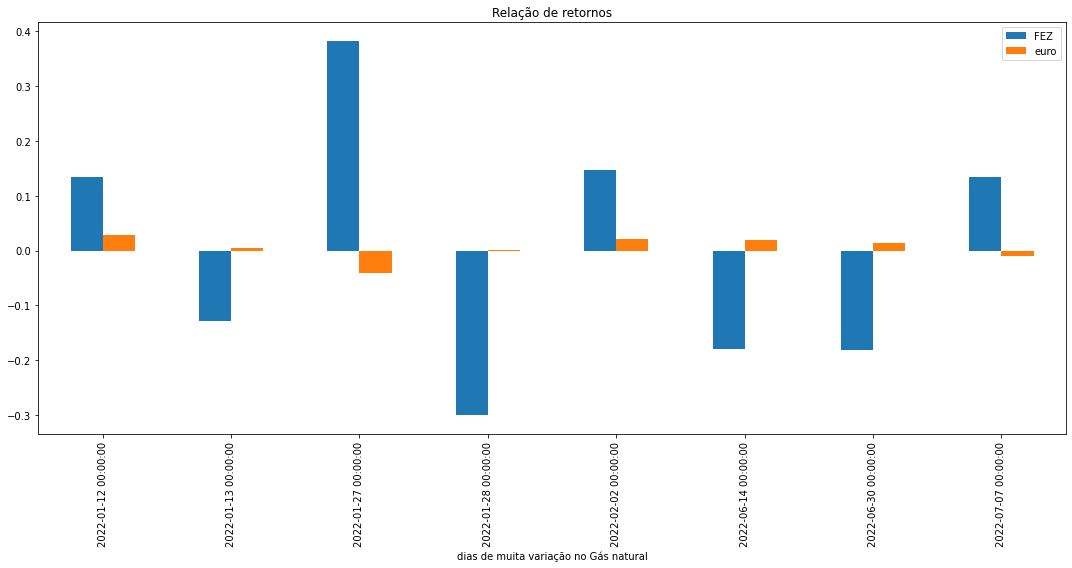

In [ ]:
# cor = np.corrcoef(plot['NGc1'],plot['euro'])
# cor[0][1]

plot = pd.DataFrame()
plot['Date'] = stressedGN.index
plot['FEZ'] = list(stressedGN['return'])
plot['euro'] = list(stressedEURO['return']*4)
plot.set_index('Date',inplace = True)

plot.plot(kind="bar",figsize=(15, 8))

plt.title("Relação de retornos")

plt.xlabel("dias de muita variação no Gás natural")
# cor = np.corrcoef(plot['NGc1'],plot['euro'])
# cor[0][1]
# plt.ylabel("retornos (retorno do euro está multiplicado por 4)")
# print('correlação entre ETF e euro no ano foi', cor[0][1])



In [ ]:
cor = np.corrcoef(plot['FEZ'],plot['euro'])
cor[0][1]

-0.4779191249882937